In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("..\datasets\mergersandacquisitions.csv")

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kianh\AppData\Local\Temp\ipykernel_29656\2738977757.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\datasets\mergersandacquisitions.csv")


In [3]:
df

,date,acquried_company,acquring_company,business,country,price
0,"February 12, 2001",Dejavue,Google Groups,Usenet,United States,—
1,"September 20, 2001",Outride,Google Personalized Search,Web search engine,United States,—
2,February 2003,Pyra Labs,Blogger,Weblog software,United States,—
3,April 2003,Neotonic Software,"Google Groups, Gmail",Customer relationship management,United States,—
4,April 2003,Applied Semantics,"AdSense, AdWords",Online advertising,United States,"$102,000,000"
...,...,...,...,...,...,...
240,"January 14, 2021",Fitbit,Wear OS,Wearables,United States,"$2,100,000,000"
241,February 2021,Provino,Tensor processing unit,Cloud hardware,United States,—
242,"April 5, 2021",Dysonics,Pixel Buds,Audio hardware,United States,—
243,"September 3, 2021",Playspace,Google Workspace,Collaboration tool,United States,—


In [4]:
import matplotlib
import matplotlib.pyplot as plt


In [5]:
#find the 5 most common industries in the dataset
df['business'].value_counts().head(5)

business
Online advertising           6
Mobile software              5
Social networking service    4
Web search engine            3
Security                     3
Name: count, dtype: int64

In [16]:
df.rename(columns={'business': 'industry'}, inplace=True)

In [17]:
#now plot the price on the y axis and the business on the x axis
df['industry'].value_counts().head(5).plot(kind='bar')
plt.show()

KeyError: 'business'

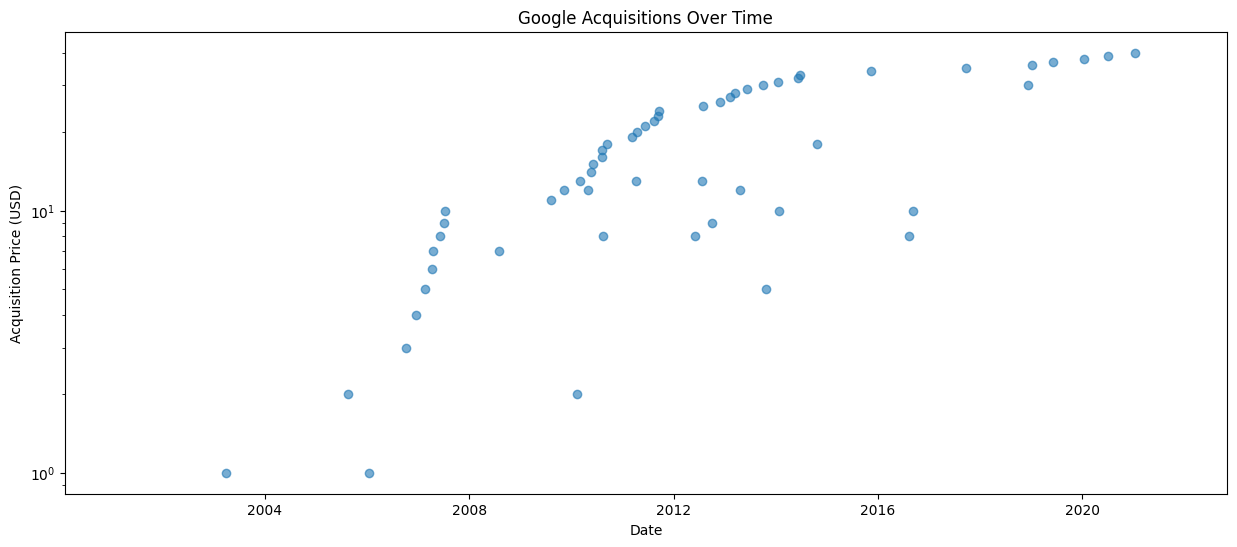

In [13]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='mixed')

# Sort by date
df = df.sort_values('date')

# Plot acquisition timeline
plt.figure(figsize=(15, 6))
plt.scatter(df['date'], df['price'], alpha=0.6)
plt.title('Google Acquisitions Over Time')
plt.xlabel('Date')
plt.ylabel('Acquisition Price (USD)')
plt.yscale('log')  # Use log scale for better visibility of smaller acquisitions
plt.show()

In [14]:
# Create a function to categorize business types
def categorize_business(business):
    if 'search' in business.lower() or 'analytics' in business.lower() or 'advertising' in business.lower():
        return 'Web Services'
    elif 'android' in business.lower() or 'mobile' in business.lower():
        return 'Mobile Technologies'
    elif 'video' in business.lower() or 'youtube' in business.lower():
        return 'Media and Content'
    elif 'social' in business.lower():
        return 'Social Networking'
    elif 'cloud' in business.lower():
        return 'Cloud Computing'
    elif 'ai' in business.lower() or 'artificial intelligence' in business.lower() or 'machine learning' in business.lower():
        return 'AI and ML'
    elif 'hardware' in business.lower() or 'device' in business.lower():
        return 'Hardware and Devices'
    elif 'security' in business.lower() or 'privacy' in business.lower():
        return 'Security and Privacy'
    else:
        return 'Other'

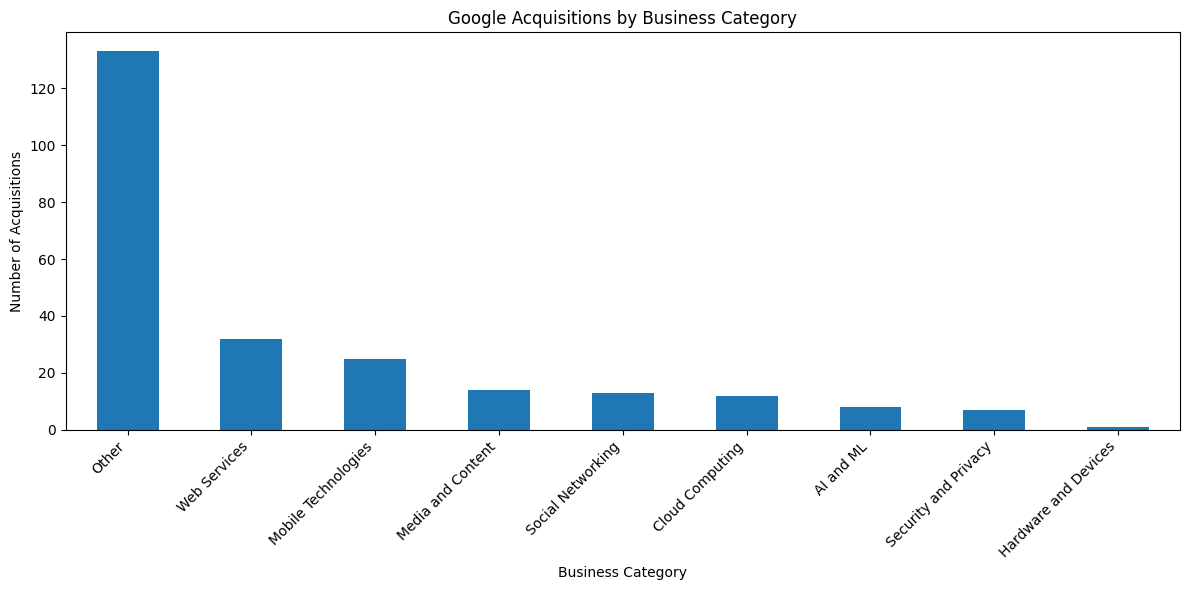

In [18]:
# Apply the categorization
df['category'] = df['industry'].apply(categorize_business)

# Count the number of acquisitions in each category
category_counts = df['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Google Acquisitions by Business Category')
plt.xlabel('Business Category')
plt.ylabel('Number of Acquisitions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()